In [128]:
%matplotlib widget

In [129]:
import ipywidgets as widgets
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sympy as sp

In [130]:
# Constants

# Gas capacity ratio
k = sp.sympify('1.4')         # [-]
# Universal Gas Constant
R = sp.sympify('287.05')      # [J/kg K]
# Universal Gas Constant
Cp = R*k/(k-1)                # [J/kg K]
# Universal Gas Constant
Cv = R/(k-1)                  # [J/kg K]

# Converging-Diverging Nozzle


## Choked Flow

When the flow is choked, flow through the orific depends only on the upstream pressure $P$
$$\dot{m} = C_D A \sqrt{\gamma \rho_{o} p_{o} \left(\frac{2}{\gamma + 1}\right)^\left(\frac{\gamma + 1}{\gamma - 1}\right)}$$

| Parameter | Description | Units|
|-----------|-------------|------|
| $\dot{m}$ | mass flow rate | kg/s
| $C_d$ | discharge coefficient | dimensionless
| $A$ | area of discharge | m**2 |
| $\gamma$ | ratio of heat capacities $\frac{C_p}{C_v}$ |dimensionless
| $\rho$ | gas density | kg/m**3
| $P$ | pressure | Pa
| $T$ | temperature | K

## P/Po

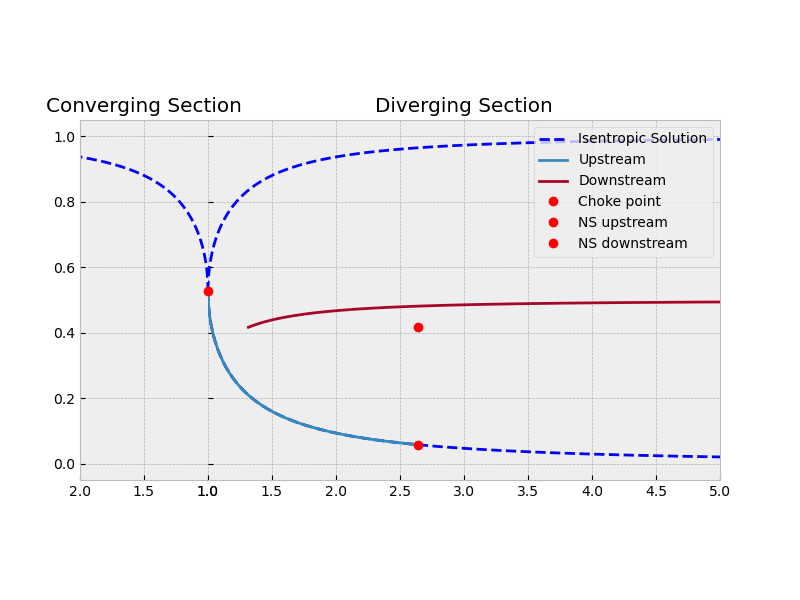

In [31]:
def plot(ns_upstream_Mach):
    
    
    M1_vals = np.linspace(0.01, 1, 1000) # Converging section
    M2_vals = np.linspace(1, 6, 1000)    # Diverging section

    # Calculate the choke point
    choke_A_A_star = lam_A_A_star(1)
    choke_p_po = lam_p_po(1)
    
    # Find the downstream Mach number at the Normal Shock
    ns_downstream_Mach = ns_M2(ns_upstream_Mach)

    # Create a continuous path from choke point to upstream of normal shock
    M_upstream_vals = np.linspace(1, ns_upstream_Mach, 1000) 
    # Create a continuous path from downstream of normal shock to infinity   
    M_downstream_vals = np.linspace(ns_downstream_Mach, 0.1, 1000)     
    

    

    
    
    # Plot Relationship between To2/To1 and M1
    with plt.style.context('bmh'):
        f, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                                    figsize=(8,6),
                                    gridspec_kw={'width_ratios': [1, 4]},
                                    sharey=True)

        # Plot isentropic solutions
        ax1.plot(lam_A_A_star(M1_vals), lam_p_po(M1_vals), 'b--')
        ax2.plot(lam_A_A_star(M1_vals), lam_p_po(M1_vals), 'b--') # Duplicate to have overlap
        ax2.plot(lam_A_A_star(M2_vals), lam_p_po(M2_vals), 'b--', label=r'Isentropic Solution')

        # Plot from choked flow to normal shock
        ax2.plot(lam_A_A_star(M_upstream_vals), lam_p_po(M_upstream_vals), '-', label=r'Upstream')

        
        # Plot from normal shock to the rest
        NSD_A_Astar = lam_A_A_star(ns_upstream_Mach)
        NSD_p_p0 = ns_p(ns_upstream_Mach)*lam_p_po(ns_upstream_Mach)
        
        
        ax2.plot(lam_A_A_star(M_downstream_vals), 
                 lam_p_po(M_downstream_vals)*ns_po(ns_upstream_Mach), 
                 '-', label=r'Downstream')        
        
        # Plot important points      
        ax1.plot([choke_A_A_star], [choke_p_po], 'ro', label='Choke point')         
        ax2.plot([choke_A_A_star], [choke_p_po], 'ro', label='Choke point') 
        ax2.plot([lam_A_A_star(ns_upstream_Mach)], 
                 [lam_p_po(ns_upstream_Mach)], 
                 'ro', label='NS upstream')    
        ax2.plot([lam_A_A_star(ns_upstream_Mach)], 
                 [ns_p(ns_upstream_Mach)*lam_p_po(ns_upstream_Mach)], 
                 'ro', label='NS downstream') 
        
          
        

    
        # Titles of graph
        ax1.set_title('Converging Section')
        ax2.set_title('Diverging Section')        
        
        # The converging section is reversed    
        ax1.invert_xaxis() 
  
        # Hide the axis lines in the middle
        ax1.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False) 
        
        # display the graph    
        ax1.set_xlim(right=1)
        ax2.set_xlim(left=1)
        ax2.set_xlim(right=5)
        ax1.set_xlim(left=2)  
    
        # Legends
        #ax1.legend()    
        ax2.legend()  
        
        # Minimize spacing between subplots
        plt.subplots_adjust(left=0.1,
                            bottom=0.2, 
                            right=0.9, 
                            top=0.8, 
                            wspace=0, 
                            hspace=0)
        plt.show()
        
plot(2.5)